## Quiz #0801

### "Text Classification with Keras"

In [78]:
import numpy as np
import pandas as pd
import re
import nltk
import os
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Embedding
from keras.utils import to_categorical
from keras.preprocessing import sequence
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping

import tensorflow.keras as keras
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,Activation
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
#nltk.download('stopwords')

#### Answer the following question by providing Python code:

1). Read in the movie review data from Cornell CS department. Carry out the EDA. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [48]:
#read the subfolders.
reviews = load_files(r'txt_sentoken',shuffle=True, encoding="utf-8")
my_docs, y = reviews.data, reviews.target

In [49]:
my_docs[0]

"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is t

In [50]:
len(my_docs)

2000

In [51]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000], dtype=int64))

C:\Anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


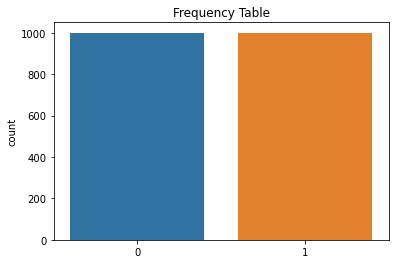

In [52]:
# Visualize the response variable.
sns.countplot(y).set_title("Frequency Table")
plt.show()


2). Carry out the data preprocessing: <br>
- Cleaning.
- Stopword removal.

Tekonization :

In [53]:
docs=[]
for i in range(len(my_docs)):
    docs.append(my_docs[i].lower())

In [54]:
sents=[]
for i in range(len(docs)):
    sents.append(nltk.sent_tokenize(docs[i]))

In [55]:
sents[0][0]

"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse ."

In [56]:
words=[]
for i in range (len(sents)):
    word=[]
    for j in range(len(sents[i])):
        word.append(sents[i][j].split(" "))
    words.append(word)

In [57]:
print(words[0][0])

['arnold', 'schwarzenegger', 'has', 'been', 'an', 'icon', 'for', 'action', 'enthusiasts', ',', 'since', 'the', 'late', "80's", ',', 'but', 'lately', 'his', 'films', 'have', 'been', 'very', 'sloppy', 'and', 'the', 'one-liners', 'are', 'getting', 'worse', '.']


Stemming :

In [58]:
from nltk.stem import PorterStemmer
porter=PorterStemmer()

In [59]:
for i in range(len(words)):
    for j in range(len(words[i])):
            words[i][j]=[porter.stem (x) for x in words[i][j]]

In [60]:
words[0][0]

['arnold',
 'schwarzenegg',
 'ha',
 'been',
 'an',
 'icon',
 'for',
 'action',
 'enthusiast',
 ',',
 'sinc',
 'the',
 'late',
 "80'",
 ',',
 'but',
 'late',
 'hi',
 'film',
 'have',
 'been',
 'veri',
 'sloppi',
 'and',
 'the',
 'one-lin',
 'are',
 'get',
 'wors',
 '.']

Assamblng words back to sentences and texts :

In [61]:
#joining words back to sentences
sentences=[]
for i in range (len(words)):
    sentence=[]
    for j in range(len(words[i])):
        sentence.append(" ".join(words[i][j]))
    sentences.append(sentence)      

In [62]:
sentences[0][0]

"arnold schwarzenegg ha been an icon for action enthusiast , sinc the late 80' , but late hi film have been veri sloppi and the one-lin are get wors ."

In [63]:
document=[]
for i in range(len(sentences)):
    a=" ".join(sentences[i])
    document.append(a)

In [64]:
document[0]

"arnold schwarzenegg ha been an icon for action enthusiast , sinc the late 80' , but late hi film have been veri sloppi and the one-lin are get wors . it' hard see arnold as mr . freez in batman and robin , especi when he say ton of ice joke , but hey he got 15 million , what' it matter to him ? onc again arnold ha sign to do anoth expens blockbust , that can't compar with the like of the termin seri , true lie and even eras . in thi so call dark thriller , the devil ( gabriel byrn ) ha come upon earth , to impregn a woman ( robin tunney ) which happen everi 1000 year , and basic destroy the world , but appar god ha chosen one man , and that one man is jericho cane ( arnold himself ) . with the help of a trusti sidekick ( kevin pollack ) , they will stop at noth to let the devil take over the world ! part of thi are actual so absurd , that they would fit right in with dogma . ye , the film is that weak , but it' better than the other blockbust right now ( sleepi hollow ) , but it make 

Stopword removal :

In [65]:
def cleantxt(txt):

    # collecting english stop words from nltk-library
    stpw = stopwords.words('english')
    
    # Adding custom stop-words
    stpw.extend(['www','http','utc'])
    stpw = set(stpw)
    
    # using regex to clean the text
    txt = re.sub(r"\n", " ", txt)
    txt = re.sub("[\<\[].*?[\>\]]", " ", txt)
    txt = txt.lower()
    txt = re.sub(r"[^a-z ]", " ", txt)
    txt = re.sub(r"\b\w{1,3}\b", " ",txt)
    txt = " ".join([x for x in txt.split() if x not in stpw])
    return txt

In [66]:
for i in range(len(document)):
    document[i]=cleantxt(document[i])

In [67]:
document[0]

'arnold schwarzenegg icon action enthusiast sinc late late film veri sloppi wors hard arnold freez batman robin especi joke million matter arnold sign anoth expens blockbust compar like termin seri true even eras call dark thriller devil gabriel byrn come upon earth impregn woman robin tunney happen everi year basic destroy world appar chosen jericho cane arnold help trusti sidekick kevin pollack stop noth devil take world part actual absurd would right dogma film weak better blockbust right sleepi hollow make world enough look like star film anyway definit seem like arnold movi type film sure gave chuckl well known seem confus charact film understand especi chang accord sourc asid form still walk much like past film sorri arnold mayb action speak action film hardli explos fight devil made place explod arnold kick devil butt chang make spiritu undoubtedli ruin film least hope cool noth occur also know film took long cost much realli super affect unless consid invis devil minut worth ov

In [68]:
df=pd.DataFrame(document,columns =['text'])


In [69]:
df['sentiment'] = y

In [70]:
df.head()

,text,sentiment
0,arnold schwarzenegg icon action enthusiast sin...,0
1,good film hard find great film beyond rare pro...,1
2,quaid star taken proffes dragonslay feel betra...,1
3,could paraphras michel pfieffer charact danger...,0
4,kolya richest film seen time zdenek sverak pla...,1


3). Carry out label encoding by integers (required form by Keras):

In [71]:
X=df.text
Y=df.sentiment
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify = Y)

In [73]:
#Tokenize the data and convert the text to sequences
from keras.preprocessing.text import Tokenizer

max_words = 1000
max_len = 150 #arbitrary chosen
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)

4). Prepare the data for AI: <br>
- Apply the padding.
- Split the data into training and testing.

In [74]:
#padding
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
print('sequences[2] length: ', len(sequences[2]))
print('sequences length: ', len(sequences))

sequences[2] length:  526
sequences length:  1700


5). Define the AI model (Embedding + LSTM):

In [75]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,128,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = keras.Model(inputs=inputs,outputs=layer)
    return model

6). Define the optimizer and compile the model:

In [76]:
model = RNN()
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

7). Train the model and visualize the summary:

In [79]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
11/11 [==============================] - 6s 571ms/step - loss: 0.6924 - accuracy: 0.5368 - val_loss: 0.6895 - val_accuracy: 0.6235
Epoch 2/10
11/11 [==============================] - 3s 269ms/step - loss: 0.6766 - accuracy: 0.7287 - val_loss: 0.6504 - val_accuracy: 0.7118
Epoch 3/10
11/11 [==============================] - 3s 286ms/step - loss: 0.5338 - accuracy: 0.7919 - val_loss: 0.4285 - val_accuracy: 0.8059
Epoch 4/10
11/11 [==============================] - 3s 283ms/step - loss: 0.3355 - accuracy: 0.8684 - val_loss: 0.4373 - val_accuracy: 0.7941


8). Display the test result (accuracy):

In [80]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [81]:
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

10/10 [==============================] - 0s 29ms/step - loss: 0.4484 - accuracy: 0.8033
Test set
  Loss: 0.448
  Accuracy: 0.803
